# Function Approximation        

In [1]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


Define the function to be approximated.

In [2]:
# testing function
def func(x):
  """
  x: array_like, N x D_in
  y: array_like, N x D_out
  """
  return x * np.sin(5 * x)

Define the computational domain.

In [3]:
# domain
geom = dde.geometry.Interval(-1, 1)

Define the problem.

In [4]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

Define the network.

In [5]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

Define the model.

In [6]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
Building feed-forward neural network...
'build' took 0.036639 s

'compile' took 0.105669 s



Train the model.

In [7]:
loss_history, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.92e-01]    [2.52e-01]    [1.10e+00]    


2024-10-24 14:47:42.177388: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


1000      [2.83e-04]    [2.78e-04]    [3.65e-02]    
2000      [5.41e-05]    [8.52e-05]    [2.02e-02]    
3000      [8.39e-06]    [4.14e-05]    [1.41e-02]    
4000      [2.99e-07]    [3.30e-05]    [1.26e-02]    
5000      [4.38e-08]    [3.19e-05]    [1.24e-02]    
6000      [2.46e-08]    [3.19e-05]    [1.24e-02]    
7000      [4.15e-06]    [3.44e-05]    [1.28e-02]    
8000      [2.05e-07]    [3.20e-05]    [1.24e-02]    
9000      [1.06e-08]    [3.12e-05]    [1.22e-02]    
10000     [7.01e-09]    [3.11e-05]    [1.22e-02]    

Best model at step 10000:
  train loss: 7.01e-09
  test loss: 3.11e-05
  test metric: [1.22e-02]

'train' took 2.412044 s



Visualize the loss history and save the plots

Saving loss history to data/loss.dat ...
Saving training data to data/train.dat ...
Saving test data to data/test.dat ...


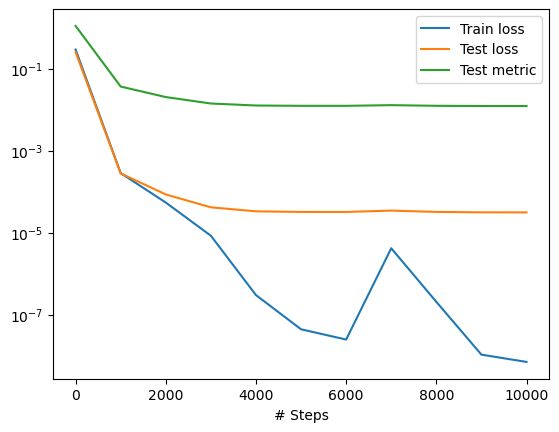

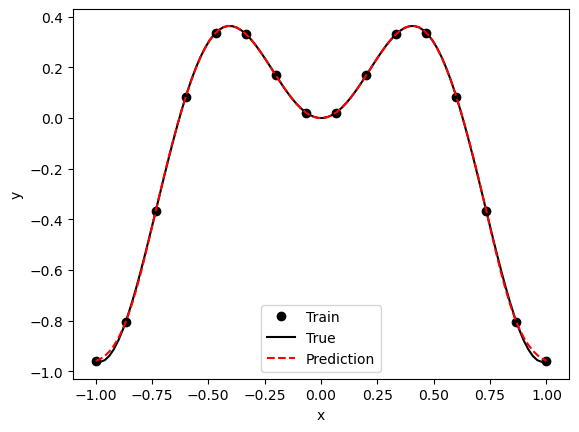

In [8]:
dde.saveplot(
  loss_history,
  train_state,
  issave=True,
  isplot=True,
  output_dir="data"
)